## Export diagnostic videos

In [1]:
import numpy as np
import os

from daart_utils.paths import data_path, results_path
from daart_utils.data import DataHandler

### define data paths

In [2]:
# select analyses to run
export_labeled_videos = False
export_syllable_videos = True

# select dataset
dataset = 'fly'

if dataset == 'fly':
    from daart_utils.session_ids.fly import SESS_IDS_ALL as sess_ids
    from daart_utils.session_ids.fly import label_names
elif dataset == 'ibl':
    from daart_utils.session_ids.ibl import SESS_IDS_ALL as sess_ids
    from daart_utils.session_ids.ibl import label_names

# choose first test session as example
sess_id = sess_ids[0]

# initialize data handler; point to correct base path
handler = DataHandler(sess_id, base_path=os.path.join(data_path, dataset))

# load available data
handler.load_video()
handler.load_markers()
handler.load_hand_labels()
handler.load_heuristic_labels()

### Video frames, markers, and labels

In [3]:
# export first 200 video frames with markers and heuristic labels
if export_labeled_videos:
    label_type = 'heuristic'  # 'hand' | 'heuristic' | 'model' (must load model states)
    idxs = np.arange(0, 200)
    save_file = os.path.join(
        results_path, dataset, '%s_annotated_%s.mp4' % (handler.session_id, label_type))
    handler.make_labeled_video(
        save_file=save_file, idxs=idxs, include_markers=True, label_type=label_type)

### Syllable videos that show snippets of each behavior

8it [00:01,  5.91it/s]


creating animation...done
saving video to /media/mattw/data/TEST-segmentation/fly/2019_08_07_fly2_syllable_hand.mp4...done


<Figure size 432x288 with 0 Axes>

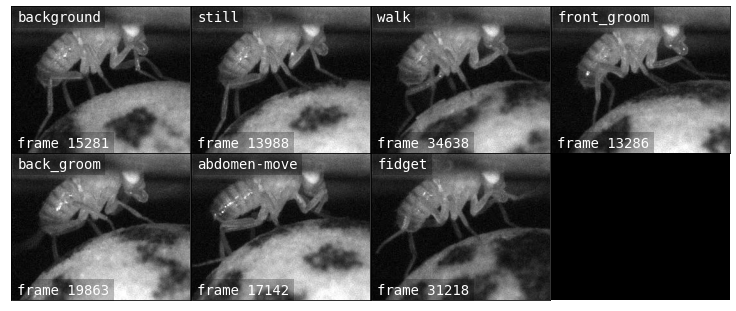

In [4]:
# export syllable videos of hand labels
if export_syllable_videos:
    
    label_type = 'hand'  # 'hand' | 'heuristic' | 'model' (must load model states)
    save_states_separately = False  # True to make state-specific videos, False to put together

    save_file = os.path.join(
        results_path, dataset, '%s_syllable_%s.mp4' % (handler.session_id, label_type))

    handler.make_syllable_video(
        save_file=save_file, label_type=label_type, max_frames=100,
        save_states_separately=save_states_separately)